**Connect Google Drive:**


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries:**


In [15]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


**Load Dataset:**


In [16]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning Track/Datasets/Mall_Customers.csv")

# display first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Features selection**

In [17]:
# Step 3: Feature selection
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Standardization**

In [18]:
# Step 4: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Plot Visualization**

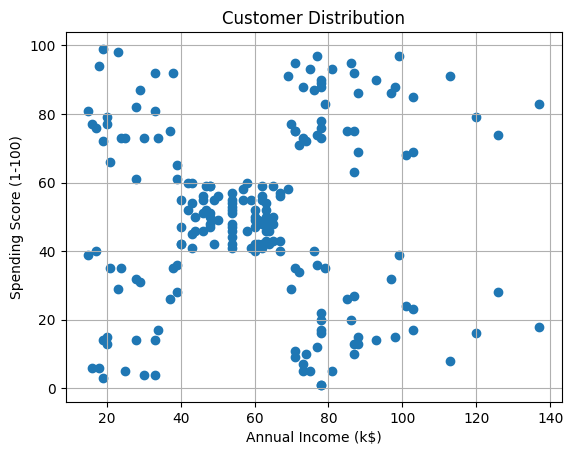

In [19]:
# Step 5: Visual exploration
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution")
plt.grid(True)
plt.show()


**Finding Optimal value**

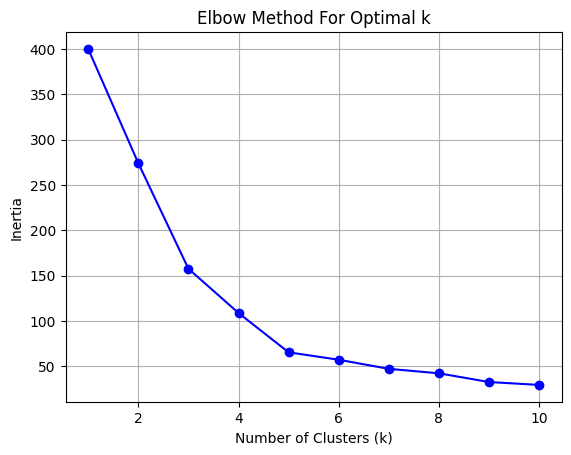

In [20]:
# Step 6: Elbow method to determine optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

**K-Mean**

In [21]:
# Step 7: Apply KMeans with chosen k (e.g., k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

**Visualization of cluster**

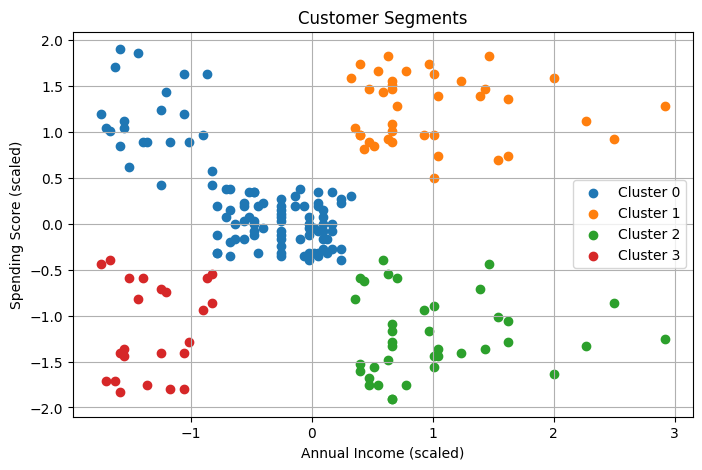

In [22]:
# Step 8: Visualize clusters
plt.figure(figsize=(8, 5))
for c in range(k):
    plt.scatter(X_scaled[clusters == c, 0], X_scaled[clusters == c, 1], label=f'Cluster {c}')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments")
plt.legend()
plt.grid(True)
plt.show()

**Finding Average**

In [23]:
# Step 9: Average spending per cluster
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per Cluster:\n", avg_spending)

Average Spending Score per Cluster:
 Cluster
0    56.480000
1    82.128205
2    18.631579
3    20.913043
Name: Spending Score (1-100), dtype: float64


**DBSCAN**

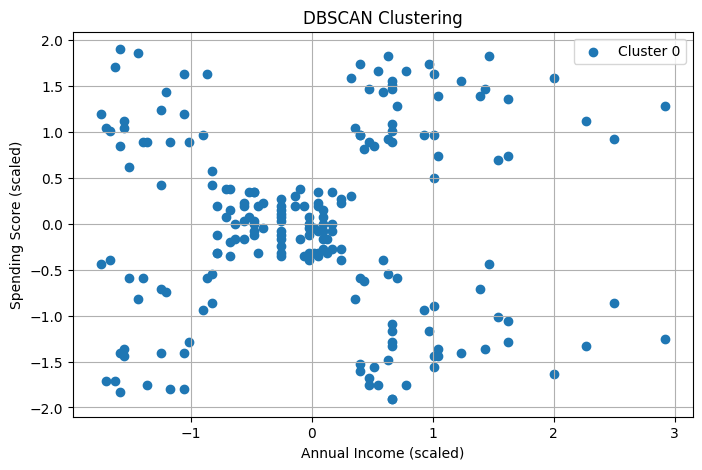

In [24]:
# Step 10: Using DBSCAN
db = DBSCAN(eps=0.8, min_samples=2)
db_labels = db.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = db_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 5))
for label in set(db_labels):
    plt.scatter(X_scaled[db_labels == label, 0], X_scaled[db_labels == label, 1], label=f'Cluster {label}')
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("DBSCAN Clustering")
plt.legend()
plt.grid(True)
plt.show()